In [215]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Define categories based on Vertice's offerings
products = ["SaaS Purchasing", "Cloud Cost Optimization", "Intelligent Workflows"]
regions = ["North America", "Europe", "Asia-Pacific", "Latin America", "Middle East & Africa"]
industries = ["Technology", "Finance", "Healthcare", "Retail", "Manufacturing"]
customer_segments = ["SMB", "Mid-Market", "Enterprise"]
onboarding_status = ["Completed", "In Progress", "Pending"]
contract_accuracy_status = ["Verified", "Pending Verification", "Needs Attention"]
support_case_status = ["Open", "Closed", "Pending"]
renewal_status = ["Renewed", "Churned", "Pending"]

# Set the number of records
num_records = 500

# Generate random data
np.random.seed(42)
data = {
    "Customer_ID": [f"CUST{i:05d}" for i in range(1, num_records + 1)],
    "Product": np.random.choice(products, num_records),
    "Region": np.random.choice(regions, num_records),
    "Industry": np.random.choice(industries, num_records),
    "Customer_Segment": np.random.choice(customer_segments, num_records),
    "Monthly_Spend": np.random.uniform(1000, 50000, num_records).round(2),
    "Savings_Achieved": np.random.uniform(500, 20000, num_records).round(2),
    "Engagement_Score": np.random.randint(1, 100, num_records),
    "Onboarding_Date": [pd.Timestamp("2023-01-01") + pd.to_timedelta(random.randint(0, 365), unit="d") for _ in range(num_records)],
    "Onboarding_Status": np.random.choice(onboarding_status, num_records),
    "Contract_Accuracy_Status": np.random.choice(contract_accuracy_status, num_records),
    "Support_Case_Status": np.random.choice(support_case_status, num_records),
    "Interactions_Logged": np.random.randint(1, 50, num_records),
    "Data_Issues_Flagged": np.random.randint(0, 10, num_records),
    "Bugs_Escalated": np.random.randint(0, 5, num_records),
    "CSAT_Score": np.random.randint(1, 10, num_records),  # CSAT score from 1 to 10
    "Renewal_Status": np.random.choice(renewal_status, num_records),
    "Churn_Flag": lambda: 1 if random.random() < 0.3 else 0  # 30% churn rate
}

# Convert the churn flag column into random binary values
data["Churn_Flag"] = np.random.choice([0, 1], num_records, p=[0.7, 0.3])  # 30% churn rate

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("vertice_customer_data_enhanced.csv", index=False)
print("Enhanced customer data saved as 'vertice_customer_data_enhanced.csv'")


Enhanced customer data saved as 'vertice_customer_data_enhanced.csv'


In [216]:
vertice_df = pd.read_csv("vertice_customer_data_enhanced.csv")
vertice_df.head()

,Customer_ID,Product,Region,Industry,Customer_Segment,Monthly_Spend,Savings_Achieved,Engagement_Score,Onboarding_Date,Onboarding_Status,Contract_Accuracy_Status,Support_Case_Status,Interactions_Logged,Data_Issues_Flagged,Bugs_Escalated,CSAT_Score,Renewal_Status,Churn_Flag
0,CUST00001,Intelligent Workflows,Europe,Manufacturing,SMB,49971.27,11651.51,19,2023-10-11,Completed,Verified,Closed,45,7,2,3,Pending,0
1,CUST00002,SaaS Purchasing,Europe,Manufacturing,Enterprise,3362.39,11961.50,37,2023-10-24,Pending,Needs Attention,Closed,37,4,0,1,Renewed,0
2,CUST00003,Intelligent Workflows,Asia-Pacific,Healthcare,Enterprise,48881.54,4097.29,85,2023-10-20,Completed,Verified,Pending,45,9,2,1,Pending,0
3,CUST00004,Intelligent Workflows,Europe,Healthcare,Mid-Market,20938.49,7563.59,8,2023-11-10,In Progress,Verified,Open,38,4,0,1,Churned,0
4,CUST00005,SaaS Purchasing,North America,Finance,Enterprise,43666.92,7022.97,28,2023-10-26,Pending,Needs Attention,Pending,29,1,0,8,Pending,0


In [219]:
# first up we're going to have a look at what (if any) customer metrics impact CSAT score

CSAT_overview = vertice_df.groupby("CSAT_Score").agg({
    "Interactions_Logged":"mean",
    "Data_Issues_Flagged":"mean",
    "Engagement_Score":"mean",
    "Bugs_Escalated":"mean"
}).rename(columns={
    "Interactions_Logged":"Avg_Interactions_Logged",
    "Data_Issues_Flagged":"Avg_Data_Issues_Flagged",
    "Engagement_Score":"Avg_Engagement_Score",
    "Bugs_Escalated":"Avg_Bugs_Escalated"
})
display(CSAT_overview)

# working with random data is pretty sure to yield some random results

,Avg_Interactions_Logged,Avg_Data_Issues_Flagged,Avg_Engagement_Score,Avg_Bugs_Escalated
CSAT_Score,,,,
1,22.944444,4.148148,43.018519,1.981481
2,27.581818,4.363636,49.454545,2.090909
3,21.604167,4.458333,48.916667,1.395833
4,26.887097,4.483871,50.919355,2.209677
5,24.800000,5.123077,56.830769,1.692308
6,28.800000,5.140000,48.320000,1.720000
7,24.213115,4.163934,44.196721,2.049180
8,22.789474,4.964912,47.035088,1.736842
9,24.291667,4.187500,47.541667,1.979167


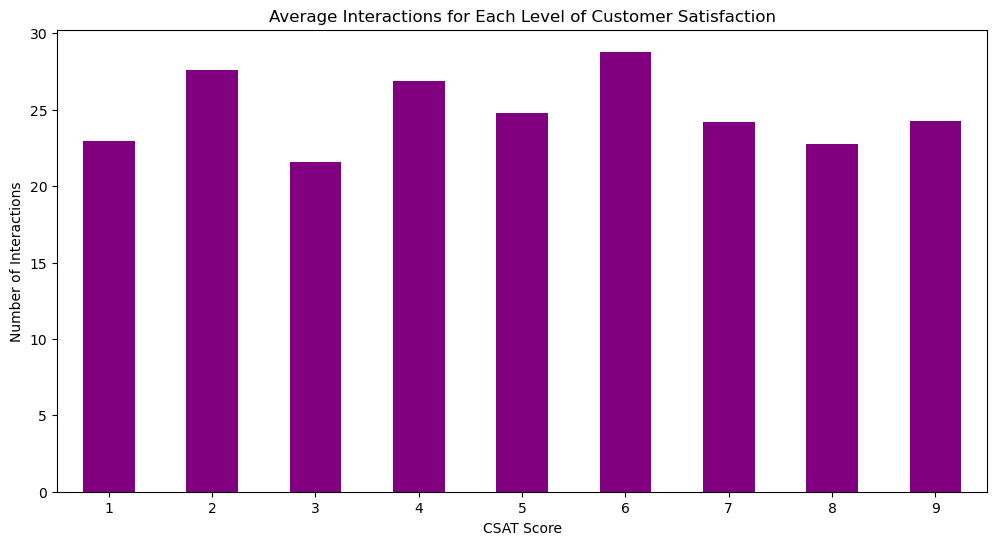

In [221]:
CSAT_overview["Avg_Interactions_Logged"].plot(kind="bar", figsize=(12,6), color="purple")
plt.title("Average Interactions for Each Level of Customer Satisfaction")
plt.ylabel("Number of Interactions")
plt.xlabel("CSAT Score")
plt.xticks(rotation=0)
plt.show()

# notice Vertice purple

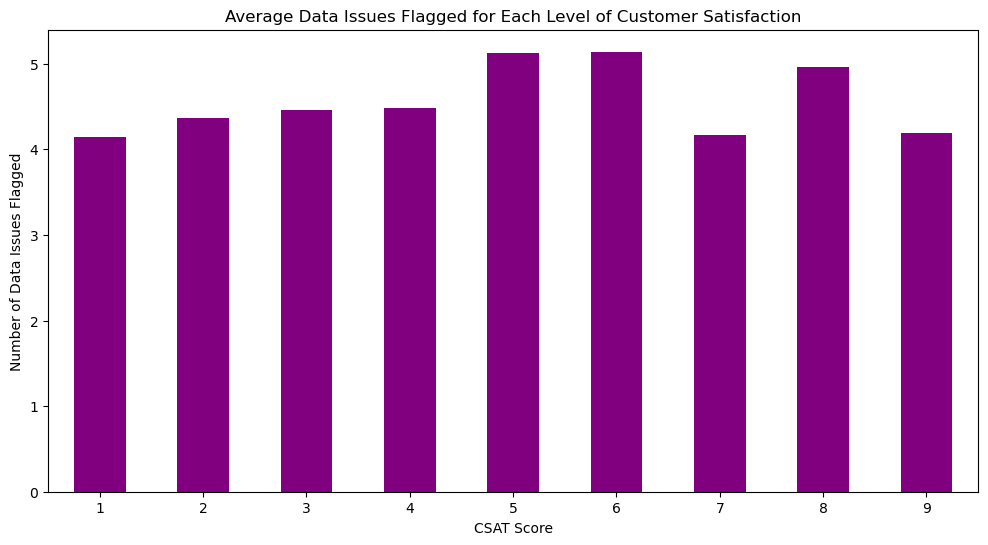

In [222]:
CSAT_overview["Avg_Data_Issues_Flagged"].plot(kind="bar", figsize=(12,6), color="purple")
plt.title("Average Data Issues Flagged for Each Level of Customer Satisfaction")
plt.ylabel("Number of Data Issues Flagged")
plt.xlabel("CSAT Score")
plt.xticks(rotation=0)
plt.show()

# In the interest of the brevity of this notebook we will move on to a new analysis

In [224]:
vertice_df.head()

,Customer_ID,Product,Region,Industry,Customer_Segment,Monthly_Spend,Savings_Achieved,Engagement_Score,Onboarding_Date,Onboarding_Status,Contract_Accuracy_Status,Support_Case_Status,Interactions_Logged,Data_Issues_Flagged,Bugs_Escalated,CSAT_Score,Renewal_Status,Churn_Flag
0,CUST00001,Intelligent Workflows,Europe,Manufacturing,SMB,49971.27,11651.51,19,2023-10-11,Completed,Verified,Closed,45,7,2,3,Pending,0
1,CUST00002,SaaS Purchasing,Europe,Manufacturing,Enterprise,3362.39,11961.50,37,2023-10-24,Pending,Needs Attention,Closed,37,4,0,1,Renewed,0
2,CUST00003,Intelligent Workflows,Asia-Pacific,Healthcare,Enterprise,48881.54,4097.29,85,2023-10-20,Completed,Verified,Pending,45,9,2,1,Pending,0
3,CUST00004,Intelligent Workflows,Europe,Healthcare,Mid-Market,20938.49,7563.59,8,2023-11-10,In Progress,Verified,Open,38,4,0,1,Churned,0
4,CUST00005,SaaS Purchasing,North America,Finance,Enterprise,43666.92,7022.97,28,2023-10-26,Pending,Needs Attention,Pending,29,1,0,8,Pending,0


In [227]:
# Original df didn't assign 1/0 to cells correctly. Need to ensure if Churned then Churn Flag = 1
vertice_df["Churn_Flag"] = vertice_df["Renewal_Status"].apply(lambda x:1 if x == "Churned" else 0)

In [229]:
# let's have a look at a churn analysis
churn_summary = vertice_df.groupby(["Region", "Customer_Segment", "Product"]).agg({
    "Churn_Flag":"count",
    "CSAT_Score":"mean",
}).rename(columns={
    "Churn_Flag":"Count_of_Churned_Customers",
    "CSAT_Score":"Avg_CSAT_Score"
})
 
display(churn_summary)

Count_of_Churned_Customers  \
Region               Customer_Segment Product                                               
Asia-Pacific         Enterprise       Cloud Cost Optimization                          12   
                                      Intelligent Workflows                             9   
                                      SaaS Purchasing                                   9   
                     Mid-Market       Cloud Cost Optimization                          11   
                                      Intelligent Workflows                             8   
                                      SaaS Purchasing                                  10   
                     SMB              Cloud Cost Optimization                          13   
                                      Intelligent Workflows                            10   
                                      SaaS Purchasing                                  13   
Europe               Enterprise       Cloud Cost Optimization                           9   
                                      Intelligent Workflows                             9   
                                      SaaS Purchasing                                  12   
                     Mid-Market       Cloud Cost Optimization                          12   
                                      Intelligent Workflows                            15   
                                      SaaS Purchasing                                   8   
                     SMB              Cloud Cost Optimization                          12   
                                      Intelligent Workflows                             9   
                                      SaaS Purchasing                                  12   
Latin America        Enterprise       Cloud Cost Optimization                          10   
                                      Intelligent Workflows                             5   
                                      SaaS Purchasing                                  10   
                     Mid-Market       Cloud Cost Optimization                          13   
                                      Intelligent Workflows                            15   
                                      SaaS Purchasing                                  15   
                     SMB              Cloud Cost Optimization                           8   
                                      Intelligent Workflows                            11   
                                      SaaS Purchasing                                   6   
Middle East & Africa Enterprise       Cloud Cost Optimization                          11   
                                      Intelligent Workflows                            15   
                                      SaaS Purchasing                                  12   
                     Mid-Market       Cloud Cost Optimization                           8   
                                      Intelligent Workflows                            13   
                                      SaaS Purchasing                                  13   
                     SMB              Cloud Cost Optimization                          11   
                                      Intelligent Workflows                            11   
                                      SaaS Purchasing                                  15   
North America        Enterprise       Cloud Cost Optimization                           9   
                                      Intelligent Workflows                            14   
                                      SaaS Purchasing                                  13   
                     Mid-Market       Cloud Cost Optimization                          12   
                                      Intelligent Workflows                            11   
                                      SaaS Purchasing           

In [231]:
# churn numbers seem very high - checking to see if they correctly correspond
print(vertice_df["Renewal_Status"].value_counts())
print(vertice_df["Churn_Flag"].value_counts())

Renewal_Status
Churned    174
Pending    170
Renewed    156
Name: count, dtype: int64
Churn_Flag
0    326
1    174
Name: count, dtype: int64


In [233]:
# would be a horror story of a churn rate - but the data is correctly represented so we move on

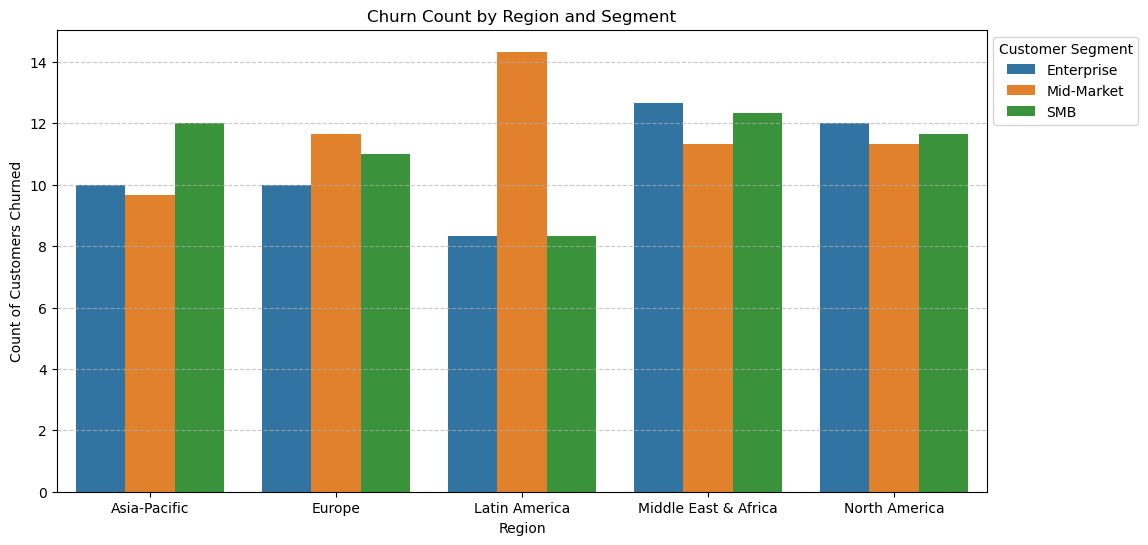

In [235]:
churn_summary_reset = churn_summary.reset_index()
plt.figure(figsize=(12,6))
sns.barplot(
    data=churn_summary_reset,
    errorbar=None,
    x="Region",
    y="Count_of_Churned_Customers",
    hue="Customer_Segment",
)
plt.title("Churn Count by Region and Segment")
plt.ylabel("Count of Customers Churned")
plt.legend(title="Customer Segment", bbox_to_anchor=(1.17,1), loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
    

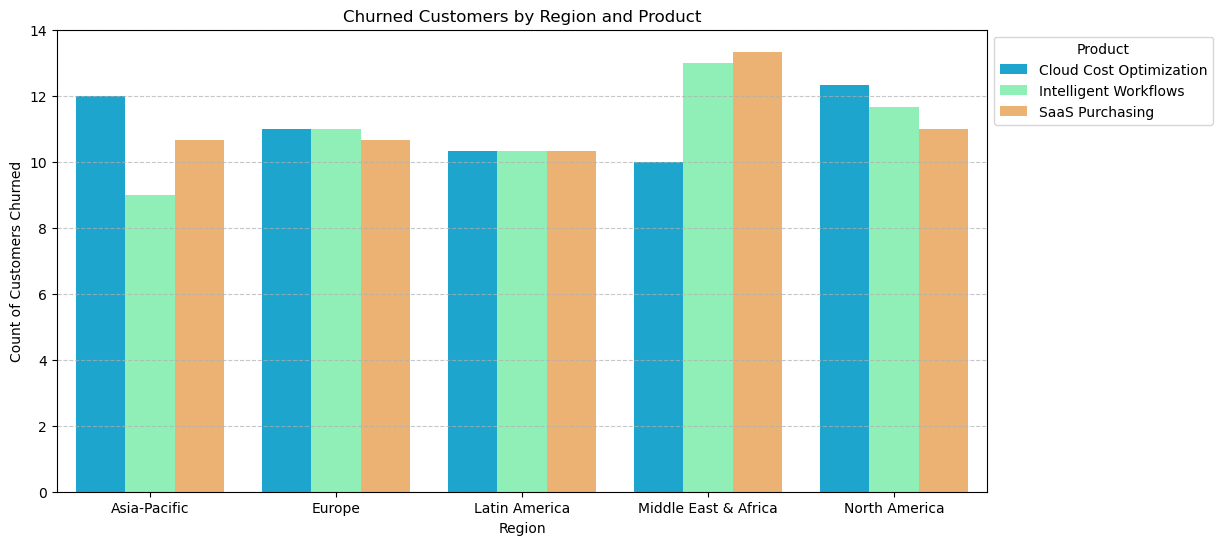

In [236]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=churn_summary_reset,
    errorbar=None,
    y="Count_of_Churned_Customers",
    x="Region",
    hue="Product",
    palette="rainbow"
)
plt.title("Churned Customers by Region and Product")
plt.ylabel("Count of Customers Churned")
plt.legend(title="Product", bbox_to_anchor=(1.25,1), loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [238]:
vertice_df.head()

,Customer_ID,Product,Region,Industry,Customer_Segment,Monthly_Spend,Savings_Achieved,Engagement_Score,Onboarding_Date,Onboarding_Status,Contract_Accuracy_Status,Support_Case_Status,Interactions_Logged,Data_Issues_Flagged,Bugs_Escalated,CSAT_Score,Renewal_Status,Churn_Flag
0,CUST00001,Intelligent Workflows,Europe,Manufacturing,SMB,49971.27,11651.51,19,2023-10-11,Completed,Verified,Closed,45,7,2,3,Pending,0
1,CUST00002,SaaS Purchasing,Europe,Manufacturing,Enterprise,3362.39,11961.50,37,2023-10-24,Pending,Needs Attention,Closed,37,4,0,1,Renewed,0
2,CUST00003,Intelligent Workflows,Asia-Pacific,Healthcare,Enterprise,48881.54,4097.29,85,2023-10-20,Completed,Verified,Pending,45,9,2,1,Pending,0
3,CUST00004,Intelligent Workflows,Europe,Healthcare,Mid-Market,20938.49,7563.59,8,2023-11-10,In Progress,Verified,Open,38,4,0,1,Churned,1
4,CUST00005,SaaS Purchasing,North America,Finance,Enterprise,43666.92,7022.97,28,2023-10-26,Pending,Needs Attention,Pending,29,1,0,8,Pending,0


In [240]:
monthly_spend_summary = vertice_df.pivot_table(
    values="Monthly_Spend",
    index="Region",
    columns="Product",
    aggfunc="sum"
).rename(columns={
    "Monthly_Spend":"Total_Monthly_Spend"
})
display(monthly_spend_summary)

Product,Cloud Cost Optimization,Intelligent Workflows,SaaS Purchasing
Region,,,
Asia-Pacific,1063599.20,720997.31,701404.08
Europe,815747.43,817986.22,872379.78
Latin America,815243.46,835747.64,843532.91
Middle East & Africa,798129.49,1009043.42,984827.49
North America,1014765.42,701368.29,803817.05


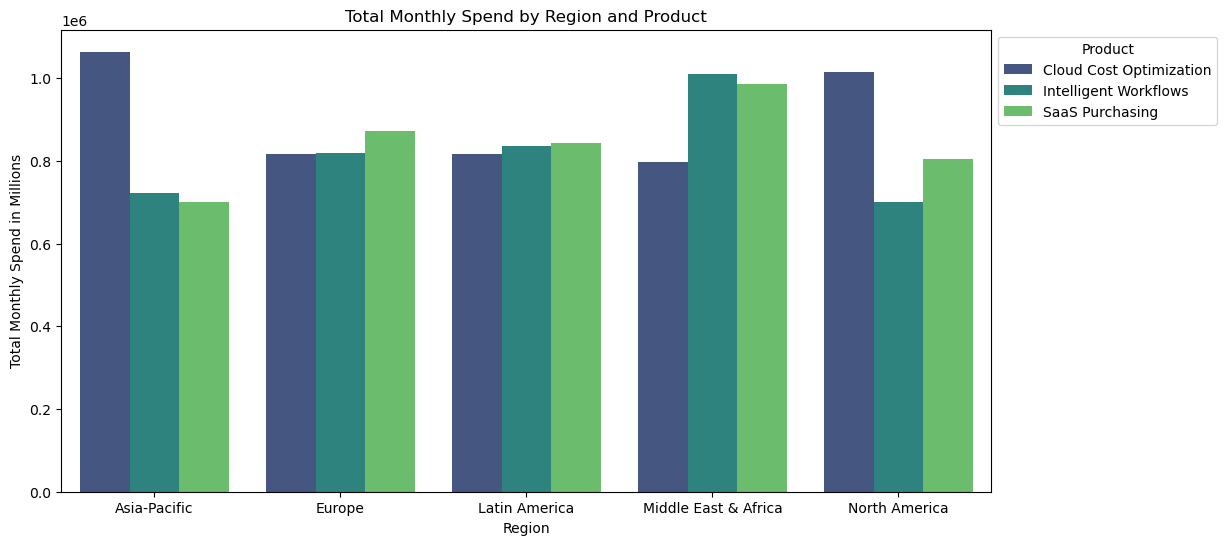

In [242]:
monthly_spend_melted = monthly_spend_summary.reset_index().melt(
    id_vars="Region",
    var_name="Product",
    value_name="Total_Monthly_Spend"
)
plt.figure(figsize=(12,6))
sns.barplot(
    data=monthly_spend_melted,
    x="Region",
    y="Total_Monthly_Spend",
    hue="Product",
    palette="viridis",
)
plt.title("Total Monthly Spend by Region and Product")
plt.ylabel("Total Monthly Spend in Millions")
plt.xlabel("Region")
plt.xticks(rotation=0)
plt.legend(title="Product", bbox_to_anchor=(1.25,1), loc="upper right")
plt.show()

In [243]:
# next up, a bit of time series analysis

vertice_df["Onboarding_Date"] = pd.to_datetime(vertice_df["Onboarding_Date"])
vertice_df["Year_Month"] = vertice_df["Onboarding_Date"].dt.to_period("M")
monthly_onboarding = vertice_df.groupby(["Region", "Year_Month"])["Customer_ID"].count()
display(monthly_onboarding)

Region         Year_Month
Asia-Pacific   2023-01        8
               2023-02        9
               2023-03        7
               2023-04        6
               2023-05       12
                             ..
North America  2023-08        8
               2023-09       13
               2023-10        7
               2023-11       10
               2023-12        9
Name: Customer_ID, Length: 62, dtype: int64

In [247]:
APAC_monthly_onboarding = monthly_onboarding.loc["Asia-Pacific"]
display(APAC_monthly_onboarding)

Year_Month
2023-01     8
2023-02     9
2023-03     7
2023-04     6
2023-05    12
2023-06     7
2023-07     7
2023-08     9
2023-09     9
2023-10    12
2023-11     4
2023-12     3
2024-01     2
Freq: M, Name: Customer_ID, dtype: int64

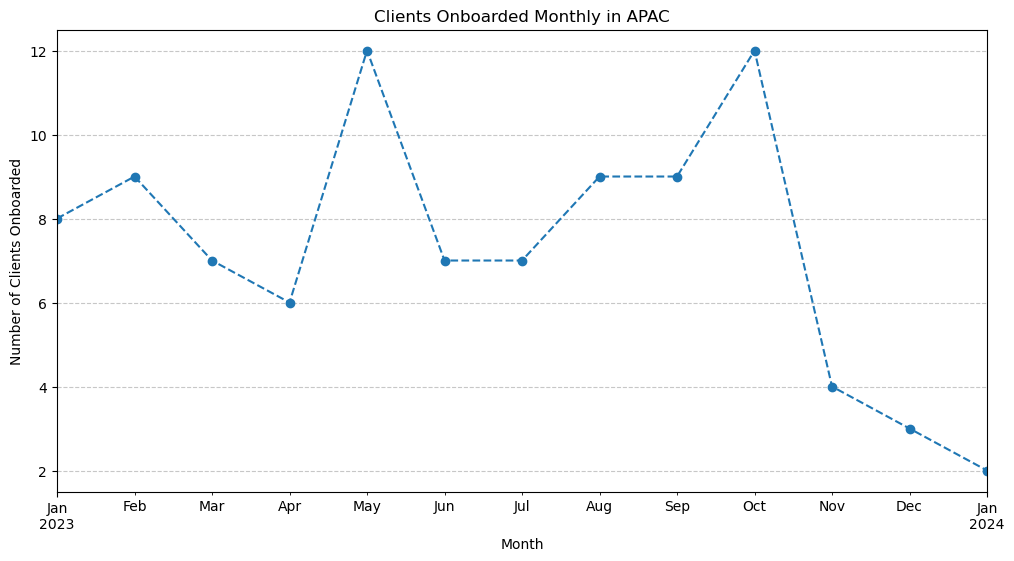

In [249]:
APAC_monthly_onboarding.plot(kind="line", linestyle="--", marker="o", figsize=(12,6))
plt.title("Clients Onboarded Monthly in APAC")
plt.ylabel("Number of Clients Onboarded")
plt.xlabel("Month")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [253]:
vertice_df.head()

,Customer_ID,Product,Region,Industry,Customer_Segment,Monthly_Spend,Savings_Achieved,Engagement_Score,Onboarding_Date,Onboarding_Status,Contract_Accuracy_Status,Support_Case_Status,Interactions_Logged,Data_Issues_Flagged,Bugs_Escalated,CSAT_Score,Renewal_Status,Churn_Flag,Year_Month
0,CUST00001,Intelligent Workflows,Europe,Manufacturing,SMB,49971.27,11651.51,19,2023-10-11,Completed,Verified,Closed,45,7,2,3,Pending,0,2023-10
1,CUST00002,SaaS Purchasing,Europe,Manufacturing,Enterprise,3362.39,11961.50,37,2023-10-24,Pending,Needs Attention,Closed,37,4,0,1,Renewed,0,2023-10
2,CUST00003,Intelligent Workflows,Asia-Pacific,Healthcare,Enterprise,48881.54,4097.29,85,2023-10-20,Completed,Verified,Pending,45,9,2,1,Pending,0,2023-10
3,CUST00004,Intelligent Workflows,Europe,Healthcare,Mid-Market,20938.49,7563.59,8,2023-11-10,In Progress,Verified,Open,38,4,0,1,Churned,1,2023-11
4,CUST00005,SaaS Purchasing,North America,Finance,Enterprise,43666.92,7022.97,28,2023-10-26,Pending,Needs Attention,Pending,29,1,0,8,Pending,0,2023-10


In [259]:
spend_summary = vertice_df.groupby(["Region", "Product", "Year_Month"]).agg(
    Total_Monthly_Revenue=("Monthly_Spend", "sum")
)
spend_summary["MoM_Revenue_Growth"] = spend_summary.groupby(["Region", "Product"])["Total_Monthly_Revenue"].pct_change()*100
spend_summary.head()

Total_Monthly_Revenue  \
Region       Product                 Year_Month                          
Asia-Pacific Cloud Cost Optimization 2023-01                  61524.27   
                                     2023-02                 122101.85   
                                     2023-03                  62607.46   
                                     2023-04                  32196.81   
                                     2023-05                  97974.63   

                                                 MoM_Revenue_Growth  
Region       Product                 Year_Month                      
Asia-Pacific Cloud Cost Optimization 2023-01                    NaN  
                                     2023-02              98.461274  
                                     2023-03             -48.725216  
                                     2023-04             -48.573525  
                                     2023-05             204.299184

In [282]:
spend_summary_reset = spend_summary.reset_index()
spend_summary_reset["Year_Month"] = spend_summary_reset["Year_Month"].astype(str)
spend_summary_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Region                 171 non-null    object 
 1   Product                171 non-null    object 
 2   Year_Month             171 non-null    object 
 3   Total_Monthly_Revenue  171 non-null    float64
 4   MoM_Revenue_Growth     156 non-null    float64
dtypes: float64(2), object(3)
memory usage: 6.8+ KB


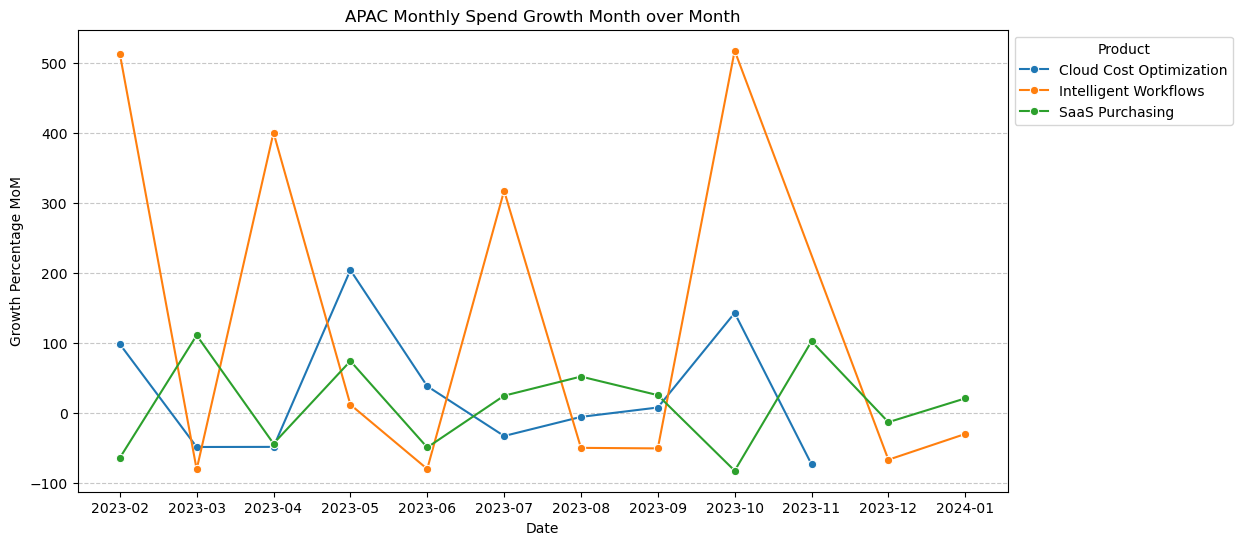

In [292]:
APAC_growth = spend_summary_reset[spend_summary_reset["Region"]=="Asia-Pacific"]
plt.figure(figsize=(12,6))
sns.lineplot(
    data=APAC_growth,
    x="Year_Month",
    y="MoM_Revenue_Growth",
    hue="Product",
    marker="o"
)
plt.title("APAC Monthly Spend Growth Month over Month")
plt.xlabel("Date")
plt.ylabel("Growth Percentage MoM")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Product", bbox_to_anchor=(1.25,1), loc="upper right")
plt.show()

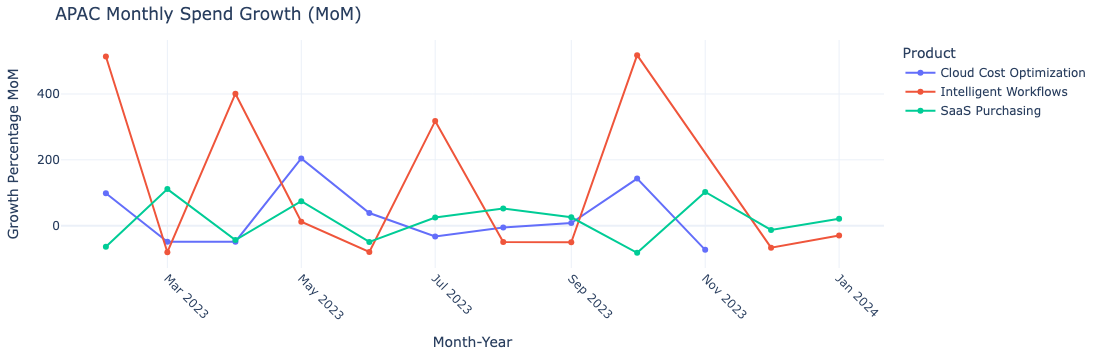

In [298]:
# making the above graph interactive with Plotly. Still need to work on proficiency with this

import plotly.express as px

fig = px.line(
    APAC_growth,
    x="Year_Month",
    y="MoM_Revenue_Growth",
    color="Product",
    markers=True,
    title="APAC Monthly Spend Growth (MoM)",
    labels={
        "Year_Month": "Month-Year",
        "MoM_Revenue_Growth": "MoM Growth (%)",
        "Product": "Product"
    },
    template="plotly_white"
)

# Customize layout
fig.update_traces(line=dict(width=2))  # Thicker lines for better visibility
fig.update_layout(
    legend_title="Product",
    xaxis=dict(tickangle=45),  # Rotate x-axis labels
    yaxis=dict(title="Growth Percentage MoM"),
    margin=dict(l=40, r=40, t=40, b=40)
)

fig.show()


In [301]:
vertice_df.head()

,Customer_ID,Product,Region,Industry,Customer_Segment,Monthly_Spend,Savings_Achieved,Engagement_Score,Onboarding_Date,Onboarding_Status,Contract_Accuracy_Status,Support_Case_Status,Interactions_Logged,Data_Issues_Flagged,Bugs_Escalated,CSAT_Score,Renewal_Status,Churn_Flag,Year_Month
0,CUST00001,Intelligent Workflows,Europe,Manufacturing,SMB,49971.27,11651.51,19,2023-10-11,Completed,Verified,Closed,45,7,2,3,Pending,0,2023-10
1,CUST00002,SaaS Purchasing,Europe,Manufacturing,Enterprise,3362.39,11961.50,37,2023-10-24,Pending,Needs Attention,Closed,37,4,0,1,Renewed,0,2023-10
2,CUST00003,Intelligent Workflows,Asia-Pacific,Healthcare,Enterprise,48881.54,4097.29,85,2023-10-20,Completed,Verified,Pending,45,9,2,1,Pending,0,2023-10
3,CUST00004,Intelligent Workflows,Europe,Healthcare,Mid-Market,20938.49,7563.59,8,2023-11-10,In Progress,Verified,Open,38,4,0,1,Churned,1,2023-11
4,CUST00005,SaaS Purchasing,North America,Finance,Enterprise,43666.92,7022.97,28,2023-10-26,Pending,Needs Attention,Pending,29,1,0,8,Pending,0,2023-10


In [309]:
segment_overview = vertice_df.groupby("Customer_Segment").agg(
    Avg_CSAT=("CSAT_Score","mean"),
    Total_Monthly_Spend=("Monthly_Spend","sum"),
    Total_Customers=("Customer_ID", "count"),
    Churn_Count=("Churn_Flag","sum")
)
display(segment_overview)

,Avg_CSAT,Total_Monthly_Spend,Total_Customers,Churn_Count
Customer_Segment,,,,
Enterprise,4.679245,3915270.21,159,53
Mid-Market,5.045714,4541544.34,175,67
SMB,5.234940,4341774.64,166,54


In [313]:
segment_overview["Churn_Rate"] = (segment_overview["Churn_Count"] / segment_overview["Total_Customers"]) * 100
display(segment_overview)

,Avg_CSAT,Total_Monthly_Spend,Total_Customers,Churn_Count,Churn_Rate
Customer_Segment,,,,,
Enterprise,4.679245,3915270.21,159,53,33.333333
Mid-Market,5.045714,4541544.34,175,67,38.285714
SMB,5.234940,4341774.64,166,54,32.530120


In [319]:
segment_overview["Low_CSAT_Flag"] = segment_overview["Avg_CSAT"]<5
segment_overview["High_Churn_Flag"] = segment_overview["Churn_Rate"] > 35
display(segment_overview)

,Avg_CSAT,Total_Monthly_Spend,Total_Customers,Churn_Count,Churn_Rate,Low_CSAT_Flag,High_Churn_Flag
Customer_Segment,,,,,,,
Enterprise,4.679245,3915270.21,159,53,33.333333,True,False
Mid-Market,5.045714,4541544.34,175,67,38.285714,False,True
SMB,5.234940,4341774.64,166,54,32.530120,False,False


In [321]:
vertice_df.head()

,Customer_ID,Product,Region,Industry,Customer_Segment,Monthly_Spend,Savings_Achieved,Engagement_Score,Onboarding_Date,Onboarding_Status,Contract_Accuracy_Status,Support_Case_Status,Interactions_Logged,Data_Issues_Flagged,Bugs_Escalated,CSAT_Score,Renewal_Status,Churn_Flag,Year_Month
0,CUST00001,Intelligent Workflows,Europe,Manufacturing,SMB,49971.27,11651.51,19,2023-10-11,Completed,Verified,Closed,45,7,2,3,Pending,0,2023-10
1,CUST00002,SaaS Purchasing,Europe,Manufacturing,Enterprise,3362.39,11961.50,37,2023-10-24,Pending,Needs Attention,Closed,37,4,0,1,Renewed,0,2023-10
2,CUST00003,Intelligent Workflows,Asia-Pacific,Healthcare,Enterprise,48881.54,4097.29,85,2023-10-20,Completed,Verified,Pending,45,9,2,1,Pending,0,2023-10
3,CUST00004,Intelligent Workflows,Europe,Healthcare,Mid-Market,20938.49,7563.59,8,2023-11-10,In Progress,Verified,Open,38,4,0,1,Churned,1,2023-11
4,CUST00005,SaaS Purchasing,North America,Finance,Enterprise,43666.92,7022.97,28,2023-10-26,Pending,Needs Attention,Pending,29,1,0,8,Pending,0,2023-10
